In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [171]:
data = pd.read_csv('D:\\Data-science\\Titanic_train.csv')
#data.head()

In [91]:
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1,inplace=True)

In [173]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [174]:
data['Cabin'].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [175]:
data.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [190]:
long_df = data['Cabin'].str.split(' ', expand=True)
split_cabin_long = pd.concat([data[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].loc[data.index.repeat(2)].reset_index(drop=True), long_df.stack().reset_index(drop=True)], axis=1)
split_cabin_long.columns = ['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','cabin_split']


In [191]:
split_cabin_long.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,3564.000000,3564.000000,2856.000000,3564.000000,3564.000000,3564.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486388,0.835719,14.518863,1.102279,0.805718,49.672504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
split_cabin_long.drop('Ticket', axis=1, inplace=True)

### Data visulation Histogram

Text(0.5, 1.0, 'Histogram of Parch Data')

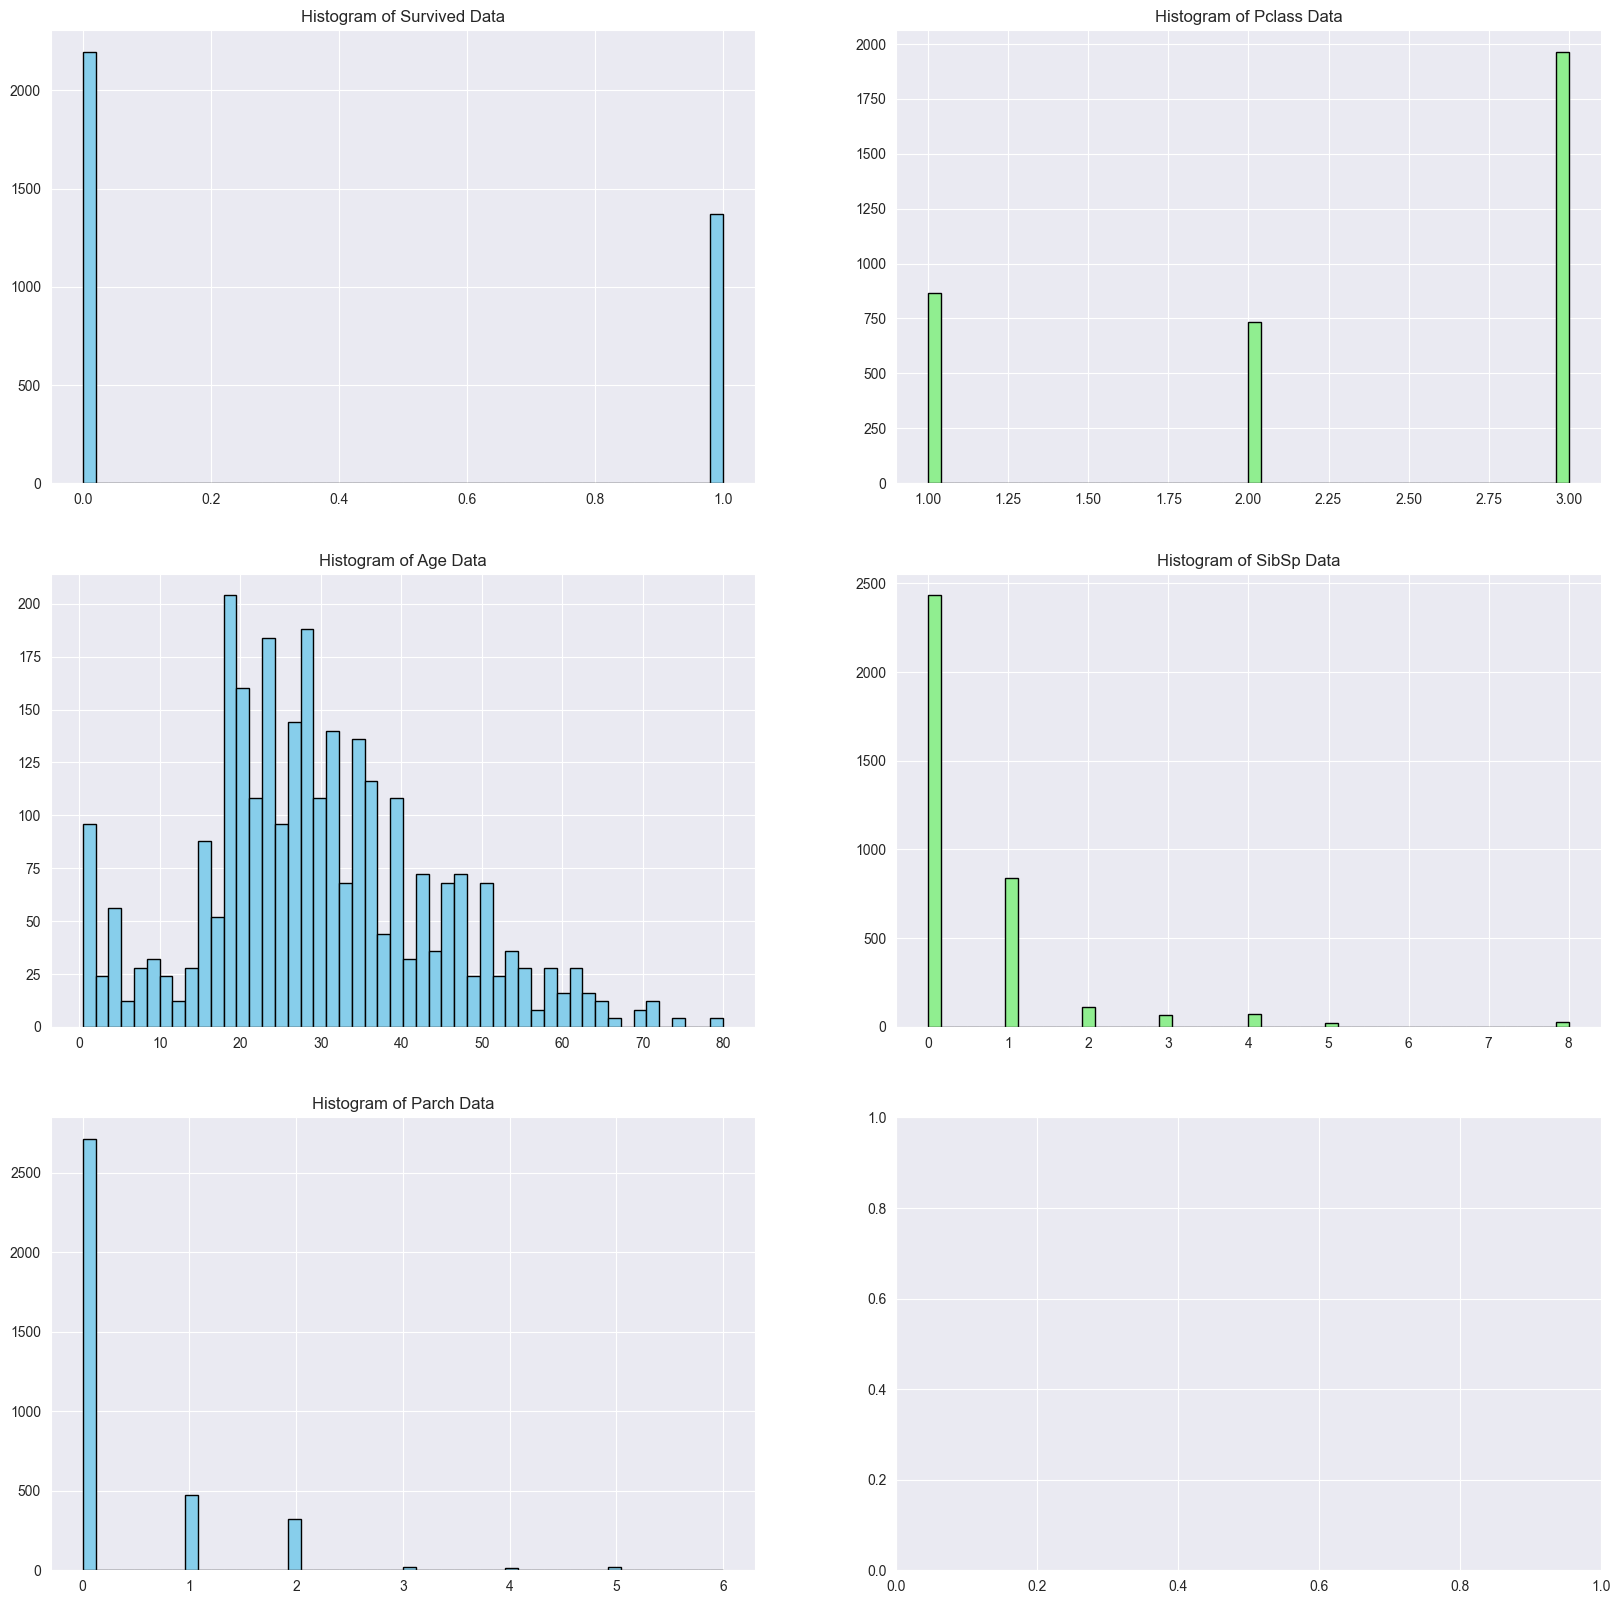

In [193]:
fig, axs = plt.subplots(3, 2,figsize=(20, 20))
axs[0, 0].hist(split_cabin_long['Survived'], bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of Survived Data')

axs[0, 1].hist(split_cabin_long['Pclass'], bins=50, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Histogram of Pclass Data')

axs[1, 0].hist(split_cabin_long['Age'], bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Histogram of Age Data')

axs[1, 1].hist(split_cabin_long['SibSp'], bins=50, color='lightgreen', edgecolor='black')
axs[1, 1].set_title('Histogram of SibSp Data')

axs[2, 0].hist(split_cabin_long['Parch'], bins=50, color='skyblue', edgecolor='black')
axs[2, 0].set_title('Histogram of Parch Data')



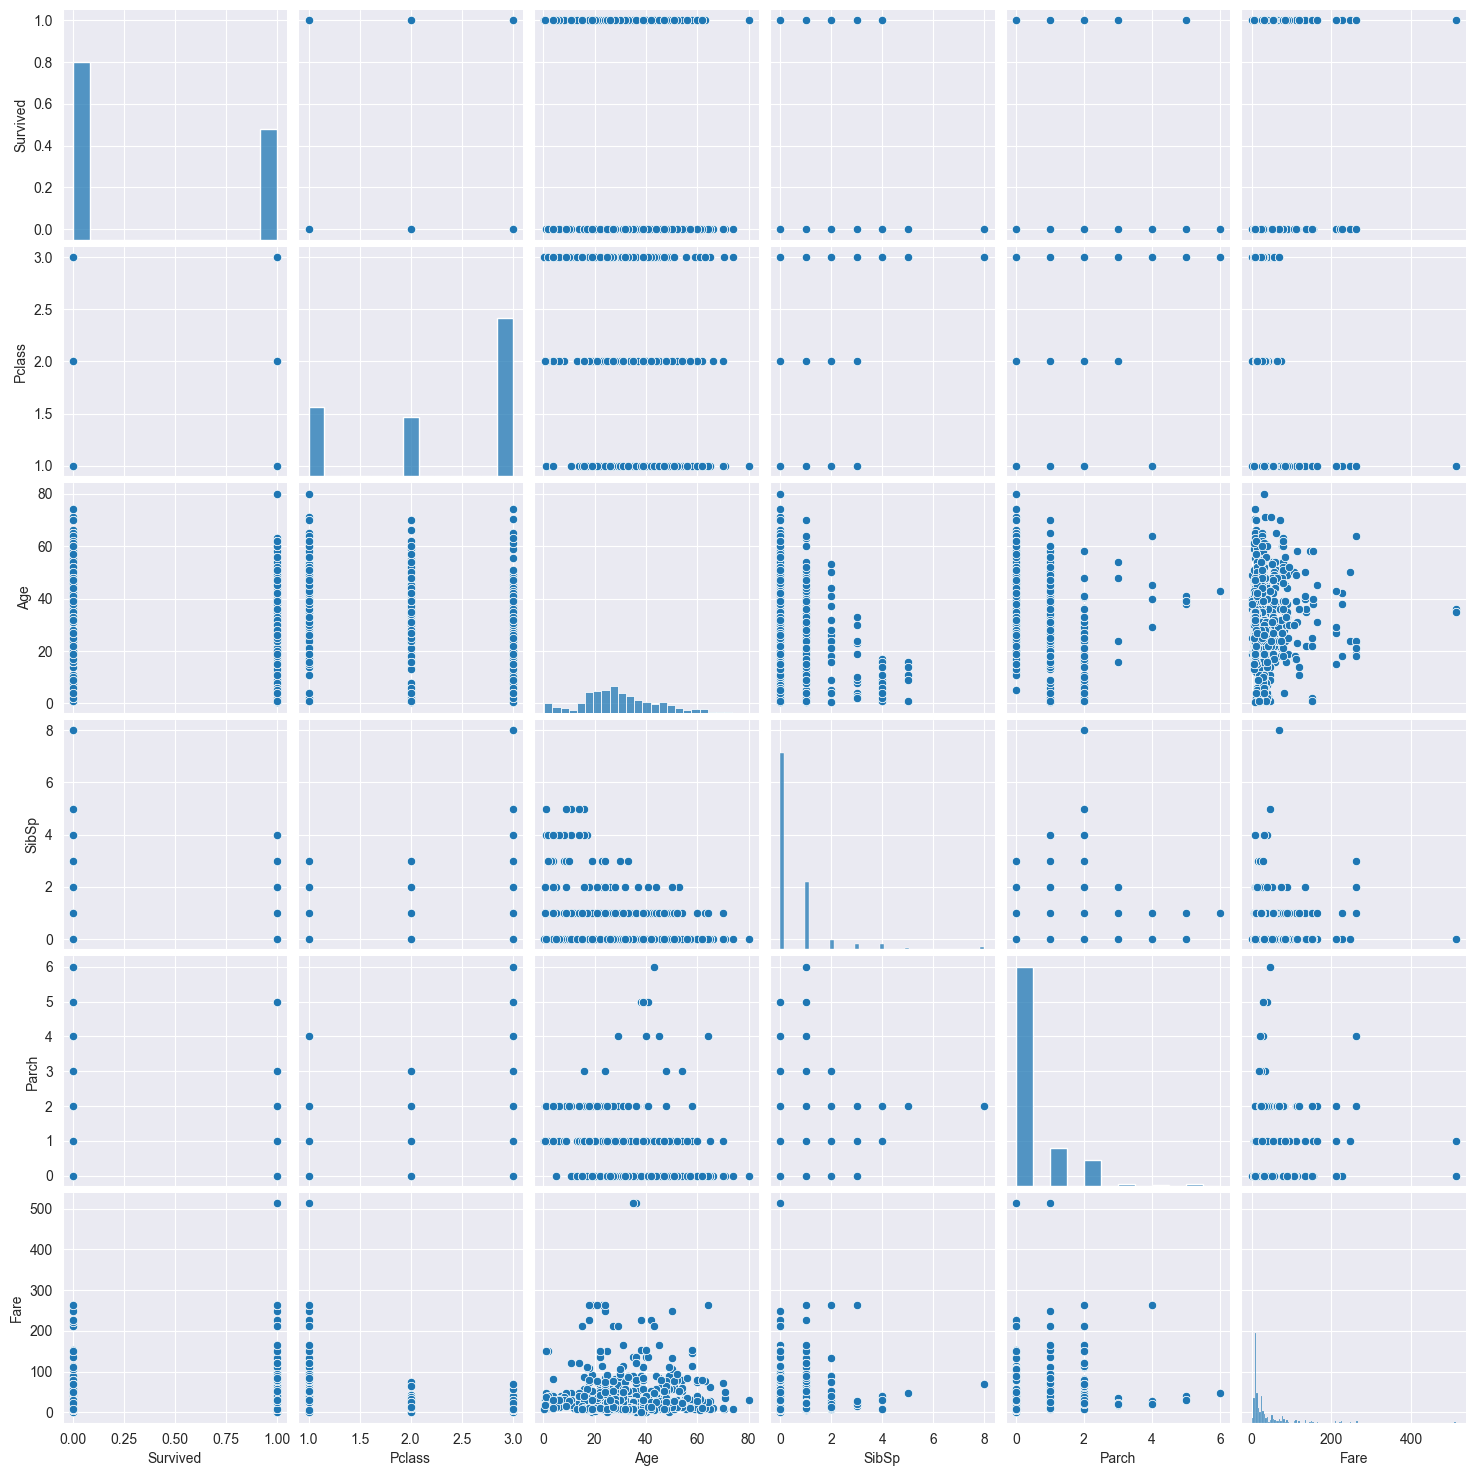

In [179]:
sns.set_style(style='darkgrid')
sns.pairplot(split_cabin_long)

In [194]:
data = split_cabin_long

### Data Preprocessing:

In [195]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1 = data[['cabin_split']]
numeric_data = encoder.fit_transform(data1)
data2 = data[['Sex']]
numeric_data2 = encoder.fit_transform(data2)
data3 = data[['Embarked']]
numeric_data3 = encoder.fit_transform(data3)


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
data['cabin_numeric']=numeric_data
data['Gender'] = numeric_data2
data['Embarked_numeric'] = numeric_data3


In [197]:
train_data = data.copy()   

In [198]:
train_data.drop('Sex', axis=1, inplace=True)
train_data.drop('Embarked', axis=1, inplace=True)
train_data.drop('cabin_split', axis=1, inplace=True)
train_data.drop('Fare', axis=1, inplace=True)

In [199]:
train_data.drop('Cabin', axis=1, inplace=True)


In [200]:
train_data.isnull().sum()
train_data = train_data.dropna()


####  Model Building:

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [202]:
X = train_data.iloc[:,1:]
Y = train_data.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [203]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [205]:
# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0)
Classifier.fit(X_train, Y_train)

C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

#### Make Predictions and Evaluate the Model


In [206]:
y_pred = Classifier.predict(X_test)


In [207]:
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [208]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[305  44]
 [ 68 155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       349
           1       0.78      0.70      0.73       223

    accuracy                           0.80       572
   macro avg       0.80      0.78      0.79       572
weighted avg       0.80      0.80      0.80       572



##### ROC (Receiver Operating Curve)

In [209]:
from sklearn.metrics import roc_curve, auc

In [210]:
y_prob = Classifier.predict_proba(X_test)[:, 1]

In [211]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

AUC: 0.84


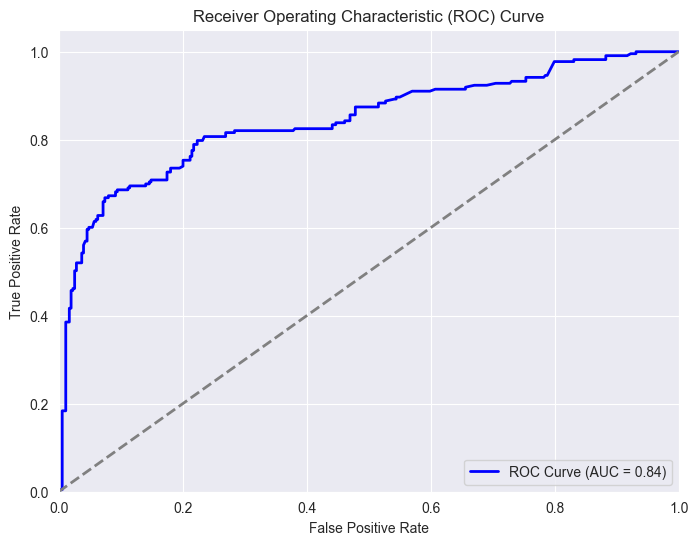

In [212]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [213]:
import streamlit as st


In [214]:
# Streamlit App
st.title("Titanic Survived Classification")

st.write("""
This app uses logistic regression to classify whether Titanic Passenger Survived ratio.
""")

2024-12-30 19:12:34.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:34.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:34.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:34.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:34.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:34.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [158]:
print(data['Embarked_numeric'].unique())

[1 0]


In [216]:

df = pd.DataFrame({'Cabin_name':data.cabin_split.unique(),'Cabin_No':data.cabin_numeric.unique()})
df1=df[df['Cabin_name']=='C85']

In [217]:
pclass_input = st.sidebar.selectbox('Pclass', train_data.Pclass.unique())
age_input = st.sidebar.number_input('Please enter age', min_value=0,max_value=150)
sib_input =st.sidebar.selectbox('SibSp', train_data.SibSp.unique())
prach_input =st.sidebar.selectbox('prach', train_data.Parch.unique())
cabin_input =st.sidebar.selectbox('Cabin', data.cabin_split.unique())
Gender_input =st.sidebar.selectbox('Gender', data.Sex.unique())
Embarked_numeric_input =st.sidebar.selectbox('Embraked', data.Embarked.unique())
df1=df[df['Cabin_name']==cabin_input]
gender = 0
if Gender_input == 'Male': gender = 1

embarked = 3
if Embarked_numeric_input == 'C': 
  embarked = 0 
elif Embarked_numeric_input == 'Q': 
  embarked = 1
elif Embarked_numeric_input == 'S': 
  embarked = 2



2024-12-30 19:12:53.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:53.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:53.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:53.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:53.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:53.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:53.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:12:53.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [221]:
user_input = np.array([[pclass_input, pclass_input, sib_input, prach_input, df.loc[0, 'Cabin_No'], gender, embarked]])
print(user_input)


[[ 3  3  1  0 93  0  2]]


In [222]:
user_input_scaled = sc.transform(user_input)
print(user_input_scaled)

[[ 0.91641332 -1.82840002  0.49998368 -0.50899069 -1.78871517 -1.31856328
   0.50868228]]


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [225]:
prediction = Classifier.predict(user_input_scaled)
print(prediction)

[1]


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [224]:
if prediction[0] == 1:
    st.write("### The Customer is **Survived**!")
else:
    st.write("### The Customer is **Not Survived**!")

2024-12-30 19:13:32.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:13:32.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:13:32.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-30 19:13:32.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
